# Preparing data for linear regression (to predict price of the listing)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from data_utils import replace_boolean_values
from data_utils import create_dummy_df
from data_utils import convert_strings_to_columns

In [2]:
LOCATION = 'munich'

df_lst = pd.read_csv(LOCATION + '/listings.csv.gz')

In [3]:
pd.options.display.max_rows=100
pd.options.display.max_columns=None
pd.options.display.max_colwidth=30

---

### Let's see what we have:

In [4]:
df_lst

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/roo...,20210322162337,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,517685,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,NaN,NaN,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Hadern,NaN,48.11476,11.48782,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""E...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/roo...,20210322162337,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,581737,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,100%,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,3.0,3.0,"['email', 'phone', 'review...",t,t,NaN,Berg am Laim,NaN,48.12071,11.63758,Entire apartment,Entire home/apt,5,NaN,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/roo...,20210322162337,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,630556,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,0%,85%,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'review...",t,t,NaN,Maxvorstadt,NaN,48.15199,11.56482,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/roo...,20210322162337,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,765694,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,NaN,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Pasing-Obermenzing,NaN,48.13898,11.46612,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Washer"", ""Ir

___

## Drop columns with all missing value

In [5]:
drop_me = df_lst.columns[df_lst.isnull().all()]
drop_me

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated',
       'license'],
      dtype='object')

In [6]:
df_lst.drop(columns=drop_me, axis=1, inplace=True)

In [7]:
df_lst.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/roo...,20210322162337,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,517685,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,NaN,NaN,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Hadern,48.11476,11.48782,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""E...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/roo...,20210322162337,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,581737,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,100%,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,3.0,3.0,"['email', 'phone', 'review...",t,t,NaN,Berg am Laim,48.12071,11.63758,Entire apartment,Entire home/apt,5,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/roo...,20210322162337,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,630556,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,0%,85%,t,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'review...",t,t,NaN,Maxvorstadt,48.15199,11.56482,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/roo...,20210322162337,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,765694,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,NaN,100%,f,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,1.0,1.0,"['email', 'phone', 'review...",t,t,"Munich, Bavaria, Germany",Pasing-Obermenzing,48.13898,11.46612,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Washer"", ""Iron"", ""Dedica...",$52.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,0,0,0,0,2021-03-23,34,2,0,2011-08-15,2020-12-23,93.0

___

## Set proper data types for numerical values

In [8]:
df_lst.price=df_lst.price.replace(to_replace='[\$,]', value='', regex=True).astype(float)

In [9]:
df_lst.host_response_rate = df_lst.host_response_rate.replace(to_replace='[\%,]', value='', regex=True).astype(float)/100

In [10]:
df_lst.host_acceptance_rate = df_lst.host_acceptance_rate.replace(to_replace='[\%,]', value='', regex=True).astype(float)/100

In [11]:
df_lst[['price', 'host_response_rate', 'host_acceptance_rate']].head()

,price,host_response_rate,host_acceptance_rate
0,80.0,NaN,NaN
1,95.0,1.0,1.00
2,99.0,0.0,0.85
3,52.0,NaN,1.00
4,55.0,1.0,0.90


___

## Set proper data types for boolean values

Use **replace_boolean_values** function defined in *data_utils.py*

In [12]:
df_lst.host_is_superhost = replace_boolean_values(df_lst.host_is_superhost)
df_lst.host_is_superhost.value_counts()

0    4062
1     855
3     156
Name: host_is_superhost, dtype: int64

In [13]:
df_lst.host_has_profile_pic = replace_boolean_values(df_lst.host_has_profile_pic)
df_lst.host_has_profile_pic.value_counts()

1    4895
3     156
0      22
Name: host_has_profile_pic, dtype: int64

In [14]:
df_lst.host_identity_verified = replace_boolean_values(df_lst.host_identity_verified)
df_lst.host_identity_verified.value_counts()

1    3811
0    1106
3     156
Name: host_identity_verified, dtype: int64

In [15]:
df_lst.instant_bookable = replace_boolean_values(df_lst.instant_bookable)
df_lst.instant_bookable.value_counts()

0    3706
1    1367
Name: instant_bookable, dtype: int64

In [16]:
df_lst.has_availability = replace_boolean_values(df_lst.has_availability)
df_lst.has_availability.value_counts()

1    5053
0      20
Name: has_availability, dtype: int64

## Split multi-string values into columns with 0 or 1 (amenities, host_verifications)

Use **convert_strings_to_columns** defined in *data_utils.py*

In [17]:
df_lst, cols = convert_strings_to_columns(df_lst, 'amenities')
df_lst

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Siemensstainlesssteeloven,WindowACunit,BBQgrill,Kombiku00fchlschrankmit2Gefrierschubladenrefrigerator,Luggagedropoffallowed,Freeparkinggarageonpremisesu20131space,steamoven,Hairdryer,Privateentrance,Minibar,Beachfront,Sharedpool,Wifiu201310Mbps,Babybath,Bedroomcomforts,Smokealarm,Tablecornerguards,Stainlesssteelinductionstove,Stainlesssteelstove,Outdoordiningarea,Dedicatedworkspace:table,Babysafetygates,Paidparkingonpremises,Breakfast,Boschelectricstove,Paidwasheru2013Inbuilding,Washeru2013u00a0Inbuilding,Wifi,Boardgames,SamsungBluetoothsoundsystem,Dedicatedworkspace:tableandofficechair,Nespressomachine,Clothingstorage:dresser,microwave,Boschoven,Kitchen,Clothingstorage:wardrobeanddresser,Paidparkinggarageonpremisesu2013EUR17perday,Aplusrefrigerator,Pocketwifi,Freeresidentialgarageonpremisesu20131space,Electricstove,Waterfront,Adatoiletries,Showergel,Wifiu2013866Mbps,BestforYOUbodysoap,-standard-bodysoap,Roomservice,Bidet,Paidparkinggarageonpremisesu2013150spaces,Dishwasher,SchottCeran,Siemenselectricstove,Bakingsheet,Buildingstaff,55HDTVwithAmazonPrimeVideo,Outletcovers,PioneerBluetoothsoundsystem,Gameconsole,Highchair,EVcharger,Iron,Boschrefrigerator,Indoorfireplace,Neffstainlesssteeloven,Freedryeru2013Inbuilding,Freewasher,ceranfeld2Stk.electricstove,Selfcheck-in,Sharedfencedgardenorbackyard,Bedlinens,Outdoorshower,AppleTV,Fireextinguisher,Self-parkingu2014u20ac12/day,Ritualsbodysoap,Gardenorbackyard,THEFLAG-ownbrandshampoo,HDTV,Clothingstorage:walk-inclosetandwardrobe,Backyard,Ricemaker,Clothingstorage:closet,Restaurant,standardcable,Cleaningproducts,TVwithstandardcable,Pool,1space,Bognerconditioner,22HDTVwithAmazonPrimeVideo,Housekeeping,BoseBluetoothsoundsystem,40HDTVwithstandardcable,Paiddryer,Siemensstainlesssteelelectricstove,Freestreetparking,Wifiu201316Mbps,Dryeru2013Inbuilding,Pingpongtable,Seifebodysoap,Hotwater,Liebherrrefrigerator,Seifenbodysoap,Microwave,Lockbox,Ski-in/Ski-out,50HDTVwithstandardcable,Paidstreetparkingoffpremises,Freeparkinggarageonpremises,Minifridge,Babymonitor,Wifiu20131000Mbps,Sonossoundsystem,HarmanKardonsoundsystemwithaux,Complimentarybreakfast,Ceilingfan,Wineglasses,Paidparkinglotonpremises,TV,Petsallowed,Paidparkinggarageonpremisesu20131space,Ritualsshampoo,Paidparkinglotonpremisesu2013EUR20perday,Dedicatedworkspace:officechairanddesk,Toiletries,officechair,Breadmaker,Clothingstorage:wardrobe,Recordplayer,Room-darkeningshades,EpsonBluetoothsoundsystem,Privatesauna,Shampoo,Firstaidkit,Continentalbreakfastavailableu2014u20ac5perpersonperday,Babysitterrecommendations,Gameconsole:PS4,Siemensinductionstove,Sauna,HarmanKardonBluetoothsoundsystem,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,Breakfastbuffetavailableu2014u20ac12perpersonperday,Whirlpooloven,HDT

In [18]:
df_lst, cols = convert_strings_to_columns(df_lst, 'host_verifications')
df_lst

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Siemensstainlesssteeloven,WindowACunit,BBQgrill,Kombiku00fchlschrankmit2Gefrierschubladenrefrigerator,Luggagedropoffallowed,Freeparkinggarageonpremisesu20131space,steamoven,Hairdryer,Privateentrance,Minibar,Beachfront,Sharedpool,Wifiu201310Mbps,Babybath,Bedroomcomforts,Smokealarm,Tablecornerguards,Stainlesssteelinductionstove,Stainlesssteelstove,Outdoordiningarea,Dedicatedworkspace:table,Babysafetygates,Paidparkingonpremises,Breakfast,Boschelectricstove,Paidwasheru2013Inbuilding,Washeru2013u00a0Inbuilding,Wifi,Boardgames,SamsungBluetoothsoundsystem,Dedicatedworkspace:tableandofficechair,Nespressomachine,Clothingstorage:dresser,microwave,Boschoven,Kitchen,Clothingstorage:wardrobeanddresser,Paidparkinggarageonpremisesu2013EUR17perday,Aplusrefrigerator,Pocketwifi,Freeresidentialgarageonpremisesu20131space,Electricstove,Waterfront,Adatoiletries,Showergel,Wifiu2013866Mbps,BestforYOUbodysoap,-standard-bodysoap,Roomservice,Bidet,Paidparkinggarageonpremisesu2013150spaces,Dishwasher,SchottCeran,Siemenselectricstove,Bakingsheet,Buildingstaff,55HDTVwithAmazonPrimeVideo,Outletcovers,PioneerBluetoothsoundsystem,Gameconsole,Highchair,EVcharger,Iron,Boschrefrigerator,Indoorfireplace,Neffstainlesssteeloven,Freedryeru2013Inbuilding,Freewasher,ceranfeld2Stk.electricstove,Selfcheck-in,Sharedfencedgardenorbackyard,Bedlinens,Outdoorshower,AppleTV,Fireextinguisher,Self-parkingu2014u20ac12/day,Ritualsbodysoap,Gardenorbackyard,THEFLAG-ownbrandshampoo,HDTV,Clothingstorage:walk-inclosetandwardrobe,Backyard,Ricemaker,Clothingstorage:closet,Restaurant,standardcable,Cleaningproducts,TVwithstandardcable,Pool,1space,Bognerconditioner,22HDTVwithAmazonPrimeVideo,Housekeeping,BoseBluetoothsoundsystem,40HDTVwithstandardcable,Paiddryer,Siemensstainlesssteelelectricstove,Freestreetparking,Wifiu201316Mbps,Dryeru2013Inbuilding,Pingpongtable,Seifebodysoap,Hotwater,Liebherrrefrigerator,Seifenbodysoap,Microwave,Lockbox,Ski-in/Ski-out,50HDTVwithstandardcable,Paidstreetparkingoffpremises,Freeparkinggarageonpremises,Minifridge,Babymonitor,Wifiu20131000Mbps,Sonossoundsystem,HarmanKardonsoundsystemwithaux,Complimentarybreakfast,Ceilingfan,Wineglasses,Paidparkinglotonpremises,TV,Petsallowed,Paidparkinggarageonpremisesu20131space,Ritualsshampoo,Paidparkinglotonpremisesu2013EUR20perday,Dedicatedworkspace:officechairanddesk,Toiletries,officechair,Breadmaker,Clothingstorage:wardrobe,Recordplayer,Room-darkeningshades,EpsonBluetoothsoundsystem,Privatesauna,Shampoo,Firstaidkit,Continentalbreakfastavailableu2014u20ac5perpersonperday,Babysitterrecommendations,Gameconsole:PS4,Siemensinductionstove,Sauna,HarmanKardonBluetoothsoundsystem,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,Breakfastbuffetavailableu2014u20ac12perpersonperday,Whirlpooloven,HDT

___

## Resolve categorical variables

In [19]:
df_lst.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'calendar_last_scraped', 'first_review', 'last_review'],
      dtype='object')

In [20]:
df_lst.select_dtypes(include='object')

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,calendar_last_scraped,first_review,last_review
0,https://www.airbnb.com/roo...,2021-03-23,Deluxw-Apartm. with roof t...,<b>The space</b><br />We o...,We are living in a outskir...,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele i...,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Hadern,"['email', 'phone', 'review...","Munich, Bavaria, Germany",Hadern,Entire apartment,Entire home/apt,1 bath,"[""Dedicated workspace"", ""E...",2021-03-23,2011-10-03,2019-10-03
1,https://www.airbnb.com/roo...,2021-04-02,Apartment Munich/East with...,<b>The space</b><br />It´s...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to me...,within an hour,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Berg am Laim,"['email', 'phone', 'review...",NaN,Berg am Laim,Entire apartment,Entire home/apt,1 bath,"[""Microwave"", ""Kitchen"", ""...",2021-04-02,2011-07-08,2019-10-06
2,https://www.airbnb.com/roo...,2021-04-01,City apartment next to Pin...,<b>The space</b><br />My c...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja un...",a few days or more,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Maxvorstadt,"['email', 'phone', 'review...",NaN,Maxvorstadt,Entire apartment,Entire home/apt,1 bath,"[""Hair dryer"", ""Bed linens...",2021-04-01,2011-06-04,2020-12-30
3,https://www.airbnb.com/roo...,2021-03-23,"Fancy, bright central roof...",<b>The space</b><br />The ...,"Very quiet, green, squirre...",https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Sanna,2011-07-01,"Munich, Bayern, Germany",outdoorsy sportive Person ...,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Pasing - Obermenzing,"['email', 'phone', 'review...","Munich, Bavaria, Germany",Pasing-Obermenzing,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Iron"", ""Dedica...",2021-03-23,2011-08-15,2020-12-23
4,https://www.airbnb.com/roo...,2021-04-02,"Own floor & bath, parking ...",Enjoy a quiet neighbourhoo...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Alex,2010-04-14,"Munich, Bayern, Germany",We love to travel and drea...,within a few hours,https://a0.muscache.com/im...,https://a0.muscache.com/im...,Sendling - Westpark,"['email', 'phone', 'review...",NaN,Sendling-Westpark,Private room in house,Private room,1 private bath,"[""Microwave"", ""Kitchen"", ""...",2021-04-02,2011-09-25,2020-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,https://www.airbnb.com/roo...,2021-03-23,Luxury Designer Apartment ...,The apartment is located w...,The street here is very al...,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Daniel,2013-02-28,"Munich, Bavaria, Germany",american\r\ni like to eat\...,within an hour,https://a0.muscache.com/im...,https://a0.muscache.com/im...,NaN,"['email', 'phone', 'facebo...","Munich, Bavaria, Germany",Altstadt-Lehel,Entire apartment,Entire home/apt,2 baths,"[""Washer"", ""Iron"", ""Dedica...",2021-03-23,NaN,NaN
5069,https://www.airbnb.com/roo...,2021-03-23,Apartment with Balcony in ...,Studio with balcony in cen...,NaN,https://a0.muscache.com/pi...,https://www.airbnb.com/use...,Silvia,2016-01-10,"Valladolid, Castilla y Leó...",Hola! Soy Silvia ¡Nos vemos!,NaN,https://a0.muscache.com/im...,https://a0.muscache.com/im...,NaN,"['email', 'phone', 'review...",NaN,Neuhausen-Nymphenburg,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Long term stay...",2021-03-23,NaN,NaN

In [21]:
df_lst.neighbourhood.value_counts()

Munich, Bayern, Germany                     2282
Munich, Bavaria, Germany                     283
Munich, BY, Germany                          191
Munich, Germany                               11
Karlsfeld, Bayern, Germany                     3
Múnich, Baviera, Germany                       1
Au-Haidhausen, BY, Germany                     1
München Solln, BY, Germany                     1
München , Bayern, Germany                      1
Munich, deutchland, Germany                    1
M, Bayern, Germany                             1
Karlsfeld, Bavaria, Germany                    1
München , Bavaria, Germany                     1
München, Bayern, DE, Bayern, Germany           1
Munich  Schwabing-West, Bavaria, Germany       1
Munich, Deutschland, Germany                   1
München Moosach, Bavaria, Germany              1
Haar, Bayern, Germany                          1
München Nymphenburg , Germany                  1
Name: neighbourhood, dtype: int64

**The most part of the neighbourhood is the same value written in different ways.**

In [22]:
cat_var_cols = ['host_location', 'host_response_time', 'host_neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']

Use **create_dummy_df** function defined in *data_utils.py*

In [23]:
df_lst_data = create_dummy_df(df=df_lst, cat_cols=cat_var_cols, dummy_na=True)
df_lst_data

id                    listing_url       scrape_id last_scraped  \
0        97945  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
1       114695  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
2       127383  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
3       159634  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
4       170154  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
...        ...                            ...             ...          ...   
5068  48761022  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5069  48778478  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5070  48780743  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
5071  48780981  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5072  48797828  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
0     Deluxw-Apartm. with roof t...  <b>The space</b><br />We o...   
1     Apartment Munich/East with...  <b>The space</b><br />It´s...   
2     City apartment next to Pin...  <b>The space</b><br />My c...   
3     Fancy, bright central roof...  <b>The space</b><br />The ...   
4     Own floor & bath, parking ...  Enjoy a quiet neighbourhoo...   
...                             ...                            ...   
5068  Luxury Designer Apartment ...  The apartment is located w...   
5069  Apartment with Balcony in ...  Studio with balcony in cen...   
5070  Wunderschöne Wohnung in de...  <b>The space</b><br />Voll...   
5071  Entire apartment in the be...  Entire apartment in the be...   
5072  Fully- furnished, central ...  Central apartment in Munic...   

              neighborhood_overview                    picture_url    host_id  \
0     We are living in a outskir...  https://a0.muscache.com/pi...     517685   
1                               NaN  https://a0.muscache.com/pi...     581737   
2                               NaN  https://a0.muscache.com/pi...     630556   
3     Very quiet, green, squirre...  https://a0.muscache.com/pi...     765694   
4                               NaN  https://a0.muscache.com/pi...     108297   
...                             ...                            ...        ...   
5068  The street here is very al...  https://a0.muscache.com/pi...    5265984   
5069                            NaN  https://a0.muscache.com/pi...   54142901   
5070  Super zentral, alles zu Fu...  https://a0.muscache.com/pi...  317502651   
5071                            NaN  https://a0.muscache.com/pi...  161107012   
5072                            NaN  https://a0.muscache.com/pi...   48130242   

                           host_url   host_name  host_since  \
0     https://www.airbnb.com/use...    Angelika  2011-04-18   
1     https://www.airbnb.com/use...     Stephan  2011-05-12   
2     https://www.airbnb.com/use...       Sonja  2011-05-26   
3     https://www.airbnb.com/use...       Sanna  2011-07-01   
4     https://www.airbnb.com/use...        Alex  2010-04-14   
...                             ...         ...         ...   
5068  https://www.airbnb.com/use...      Daniel  2013-02-28   
5069  https://www.airbnb.com/use...      Silvia  2016-01-10   
5070  https://www.airbnb.com/use...  Maximilian  2019-12-14   
5071  https://www.airbnb.com/use...         Til  2017-12-03   
5072  https://www.airbnb.com/use...     Silvana  2015-11-04   

                         host_about  host_response_rate  host_acceptance_rate  \
0     Ich freue mich auf viele i...                 NaN                   NaN   
1     I am looking forward to me...                 1.0                  1.00   
2     Hi, mein Name ist Sonja un...                 0.0                  0.85   
3     outdoorsy sportive Person ...                 NaN                  1.00   
4     We love to travel and drea...                 1.0                  0.90   
...               

___

## Select numerical columns only and fill NaN

In [24]:
df_lst_data.dtypes.value_counts()

uint8      496
int64      365
float64     23
object      18
dtype: int64

In [25]:
df_list_num = df_lst_data.select_dtypes(include=['float64', 'int64', 'uint8']).copy()

___

Check if there are some columns with too much missing values. This are actually candidates to be dropped completely.

In [26]:
df_list_num.columns[df_list_num.isnull().mean()>0.6]

Index([], dtype='object')

Not the case.

___

In [27]:
df_list_num.fillna(df_list_num.mean(), inplace=True)
df_list_num

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,,Siemensstainlesssteeloven,WindowACunit,BBQgrill,Kombiku00fchlschrankmit2Gefrierschubladenrefrigerator,Luggagedropoffallowed,Freeparkinggarageonpremisesu20131space,steamoven,Hairdryer,Privateentrance,Minibar,Beachfront,Sharedpool,Wifiu201310Mbps,Babybath,Bedroomcomforts,Smokealarm,Tablecornerguards,Stainlesssteelinductionstove,Stainlesssteelstove,Outdoordiningarea,Dedicatedworkspace:table,Babysafetygates,Paidparkingonpremises,Breakfast,Boschelectricstove,Paidwasheru2013Inbuilding,Washeru2013u00a0Inbuilding,Wifi,Boardgames,SamsungBluetoothsoundsystem,Dedicatedworkspace:tableandofficechair,Nespressomachine,Clothingstorage:dresser,microwave,Boschoven,Kitchen,Clothingstorage:wardrobeanddresser,Paidparkinggarageonpremisesu2013EUR17perday,Aplusrefrigerator,Pocketwifi,Freeresidentialgarageonpremisesu20131space,Electricstove,Waterfront,Adatoiletries,Showergel,Wifiu2013866Mbps,BestforYOUbodysoap,-standard-bodysoap,Roomservice,Bidet,Paidparkinggarageonpremisesu2013150spaces,Dishwasher,SchottCeran,Siemenselectricstove,Bakingsheet,Buildingstaff,55HDTVwithAmazonPrimeVideo,Outletcovers,PioneerBluetoothsoundsystem,Gameconsole,Highchair,EVcharger,Iron,Boschrefrigerator,Indoorfireplace,Neffstainlesssteeloven,Freedryeru2013Inbuilding,Freewasher,ceranfeld2Stk.electricstove,Selfcheck-in,Sharedfencedgardenorbackyard,Bedlinens,Outdoorshower,AppleTV,Fireextinguisher,Self-parkingu2014u20ac12/day,Ritualsbodysoap,Gardenorbackyard,THEFLAG-ownbrandshampoo,HDTV,Clothingstorage:walk-inclosetandwardrobe,Backyard,Ricemaker,Clothingstorage:closet,Restaurant,standardcable,Cleaningproducts,TVwithstandardcable,Pool,1space,Bognerconditioner,22HDTVwithAmazonPrimeVideo,Housekeeping,BoseBluetoothsoundsystem,40HDTVwithstandardcable,Paiddryer,Siemensstainlesssteelelectricstove,Freestreetparking,Wifiu201316Mbps,Dryeru2013Inbuilding,Pingpongtable,Seifebodysoap,Hotwater,Liebherrrefrigerator,Seifenbodysoap,Microwave,Lockbox,Ski-in/Ski-out,50HDTVwithstandardcable,Paidstreetparkingoffpremises,Freeparkinggarageonpremises,Minifridge,Babymonitor,Wifiu20131000Mbps,Sonossoundsystem,HarmanKardonsoundsystemwithaux,Complimentarybreakfast,Ceilingfan,Wineglasses,Paidparkinglotonpremises,TV,Petsallowed,Paidparkinggarageonpremisesu20131space,Ritualsshampoo,Paidparkinglotonpremisesu2013EUR20perday,Dedicatedworkspace:officechairanddesk,Toiletries,officechair,Breadmaker,Clothingstorage:wardrobe,Recordplayer,Room-darkeningshades,EpsonBluetoothsoundsystem,Privatesauna,Shampoo,Firstaidkit,Continentalbreakfastavailableu2014u20ac5perpersonperday,Babysitterrecommendations,Gameconsole:PS4,Siemensinductionstove,Sauna,HarmanKardonBluetoothsoundsystem,Onsiterestaurantu2014Fru00fchstu00fccksrestaurant,Breakfastbuffetavailableu2014u20ac12perpersonperday,Whirlpooloven,HDTVwithAmazonPrimeVideo,Bluetoothsoundsystem,Onsitebar,Axebodysoap,Packu2019nPlay/travelcrib,THEFLAGownBrandbodysoap,Diningtable,Sharedgym,Safe,Childrenu2019sbooksandtoys,monitor,Freewifi,Firepit,Fireplaceguards,Paidparkinggarageonpremisesu201313spaces,Dryeru2013u00a0Inunit,Gyminbuilding,Dryingrackforclothing,Freezer,Soundsystem,Securitycamerasonproperty,Du

## Cut off price outlliers

In [28]:
df_list_num.price.describe()

count     5073.000000
mean       113.464419
std        274.349634
min          0.000000
25%         50.000000
50%         79.000000
75%        120.000000
max      10762.000000
Name: price, dtype: float64

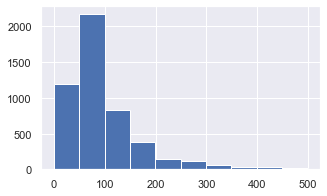

In [29]:
plt.rcParams["figure.figsize"] = [5, 3]
df_list_num[df_list_num.price < 500].price.hist();

In [30]:
df_list_num = df_list_num[df_list_num.price < 500]
df_list_num.shape

(4998, 884)

___

## Start linear regression to estimate price

In [31]:
from model_utils import run_regression
from model_utils import find_best_score

In [32]:
# check if there are any NaN values
df_list_num.columns[df_list_num.isnull().mean() > 0]

Index([], dtype='object')

Good! Let's start.

In [33]:
# target is the price
y_target_col = 'price'
# Create a ranking of features correlated (+/-) with the target
relevant_features = np.abs(df_list_num.corr()[y_target_col]).sort_values(ascending=False)

#remove columns with NaN relevancy and the target
relevant_features = relevant_features[~relevant_features.isnull()].drop(index=y_target_col)

This are columns most correlated with the price - in both directions

In [34]:
relevant_features

accommodates                               0.386155
room_type_Private room                     0.250065
property_type_Private room in apartment    0.220444
beds                                       0.203141
property_type_Entire apartment             0.203088
                                             ...   
Siemensrefrigerator                        0.000201
property_type_Private room in loft         0.000164
Piano                                      0.000090
Paidparkinglotonpremises                   0.000087
Centralairconditioning                     0.000016
Name: price, Length: 856, dtype: float64

### Start with the regression on first 10 correlated features

In [35]:
# run regression on 10 most correlated features
X = df_list_num[relevant_features[:10].index]
y = df_list_num[y_target_col]

train_score, test_score = run_regression(X, y, show_score=True)

r2 score on training data: 0.22, r2 score on test data: 0.24


In [36]:
# run regression on all relevant features
X = df_list_num[relevant_features.index]
y = df_list_num[y_target_col]

train_score, test_score = run_regression(X, y, show_score=True)

r2 score on training data: 0.52, r2 score on test data: -14530519027021611566765178880.00


#### Increasing number of used features improves r2 score on training data but dropping r2 score on test data -> **Overfitting**!

___

### Let's figure out the optimal list of features for our model

The function **find_best_score** is defined in *model_utils.py*. It increasingly includes more and more correlated features and stops training after the r2 score for test data turns to negative values. I also used an alternative where the training stopped after the r2 test score dropped down X times in a row but there was actually not difference between this two variants.

Best model with 63 features: r2_score for training set 0.38 and r2_score for test set 0.37


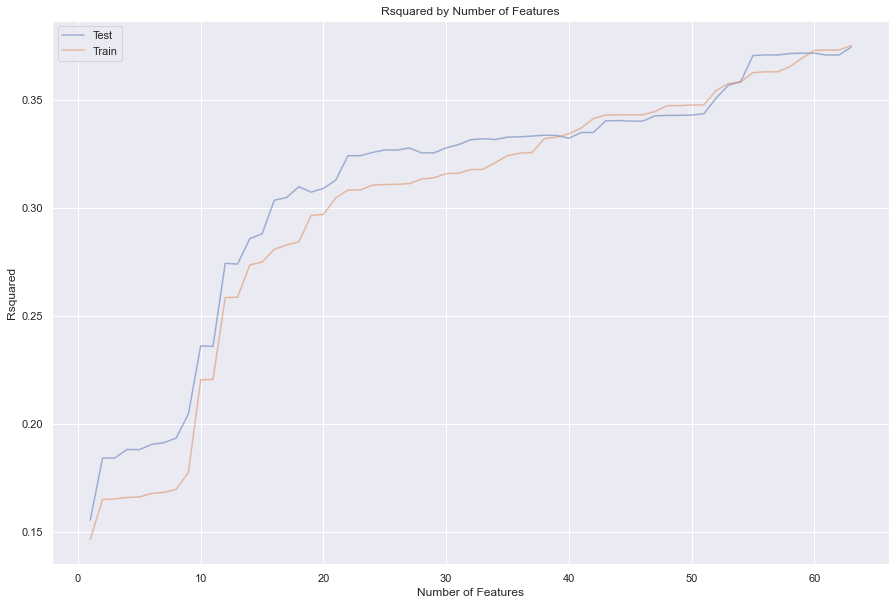

In [37]:
best_feat, r2_scores_train, r2_scores_test, train_score, test_score = find_best_score(df=df_list_num, relevant=relevant_features, y_target=y_target_col, show_score=False, negative_in_row_to_stop=10)

### Using more features, test score starts to drop and train score continues to improve. The model is overfitting. See the image below showing the graph with 20 more features:

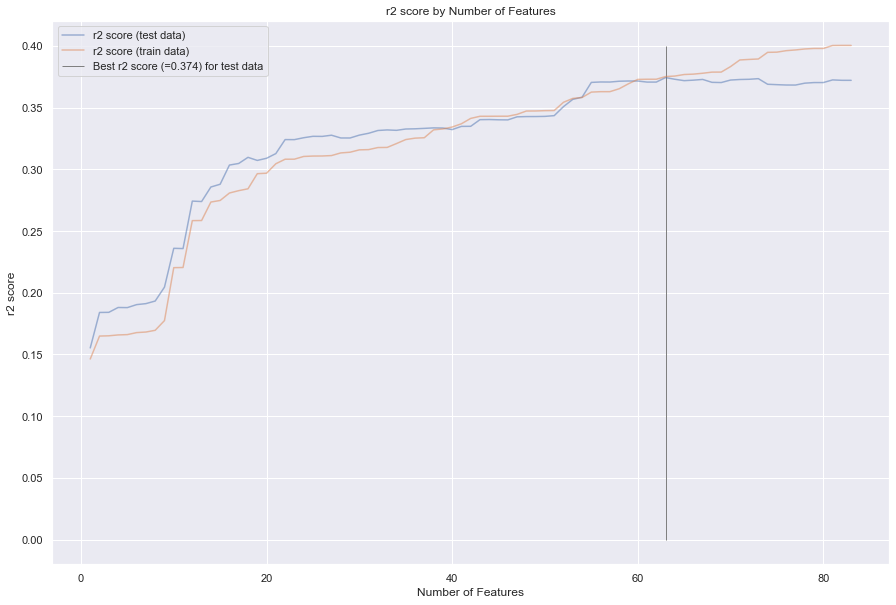

In [38]:
nfeat = best_feat+20

plt.rcParams["figure.figsize"] = [15, 10]
plt.plot(range(1, nfeat+1), r2_scores_test[:nfeat], label="r2 score (test data)", alpha=.5)
plt.plot(range(1, nfeat+1), r2_scores_train[:nfeat], label="r2 score (train data)", alpha=.5)
plt.vlines(x = best_feat, ymin = 0, ymax = 0.4, color = 'grey', linewidth=1, label='Best r2 score (={:.3f}) for test data'.format(test_score))
plt.xlabel('Number of Features')
plt.ylabel('r2 score')
plt.title('r2 score by Number of Features')
plt.legend(loc=2)        
plt.show()

### The results of the model using 63 features are pretty reasonable. The test score is similar to the train score. The model is balanced but can still be improved. Next improvements can be achieved with proper feature engineering.